# MODELO DE COMPORTAMIENTO DE CONDUCTORES Y LA GENERACIÓN DE ACCIDENTES DE TRÁNSITO
Wilson Arias Rojas <wiariasro@unal.edu.co>

¿Cómo analizar el comportamiento de conductores y poder determinar
modelos de como conductas riesgosas que conllevan a la generación de accidentes de tránsito utilizando datos obtenidos de un simulador de conducción y encuestas?

## Simulador de conducción 
Se construyo un simulador (computador +GPUs, pantallas , silla, timon - pedales, caja de cambios) y se cofiguro para que fucnionara con el software de simualcion de conducción de Foerst https://www.fahrsimulatoren.eu/en/light-vehicle. Para una revisión actualizada de simuladores de conducción ver https://en.https://en.wikipedia.org/wiki/Driving_simulator.

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/sim1.jpg)

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/sim2.jpg)

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/sim3.jpg)

##Conductas riesgosas
En este trabajo se modelaron las conductas riesgosas enviando mensajes de whapsapp al celular de individuo durante el experimeto de conducion en el simualdor. Se envairo mensasjes en tiempos aleatorios con una distibucion en tiempo del tipo proceso de Posssion con una media aporx. de 3 msgs x min (alrededor 30 msgs en los 10 mins de experimento en el   simulador de conducción que hace cada indivuduo).

##Variables observadas para cada individuo 
- Genero
- Edad
- Estrato
- NivelEd 
- Funcion de Concentracion Instantánea FCI: [0s ,10mins] -> R, el nivel de concentración se regsitra con un MindWave™ Headset https://store.neurosky.com/pages/mindwave el cual obtiene alrededor de 25000 muestras en los 10 mins de experimento en el simulador de conducción que hace cada indivuduo.

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/MindWave.jpg)
 

MindWave™ HeadsetMeasures:
- Outputs 12 bit Raw-Brainwaves (3 - 100Hz) with Sampling rate at 512Hz
- Outputs EEG power spectrums (Alpha, Beta, etc.)
- Outputs NeuroSky proprietary eSense meter such as Attention, Meditation, and other future meters
- EEG/ECG signal quality analysis (can be used to detect poor contact and whether the device is off the head)

Banda de Frecuencias de Neurosky Think Gear EEG
- Delta (1 - 3 HZ)
- Theta (4-7 HZ)
- Low Alpha (8-9 HZ)
- High Alpha (10-12 HZ)
- Low Beta (13-17 HZ)
- High Beta (18-30 HZ)
- Low Gamma (31-40 HZ)
- High Gamma (41-50 HZ)

##Representación del Espacio funcional de Funciones de Concentracion Instantánea EFCI:
Se usa la base de Wavelets de Haar paraEspacio funcional de Funciones de Concentracion Instantánea EFCI, esta representación permite obtener representaciones en diferentes niveles de resolución en tiempo  https://astrostatistics.psu.edu/su05/moudden1_061305.ppt

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WaveletsMultiresolution.png)

#Individuos que realizaron el experimento
Se logro relaizar el experimeto de conducion de 10 minutos en simulador de conducción para 167 indivisduos abajo se ve un analisis de esta poblacion de individuos.


##Conslusiones
Se encontro que con solo el coeficiente 0 de Wavelets de Haar de la Funcion de Concentracion Instantánea FCI (el promedio de la función)  tres modelos predictivos de de aprendizaje de maquina (regresion logistica, GLM binarios, Arboles de Decision obtenido usando AutoML) son capaces predecir con validacion cruzada 5-fold la ocurrencia de acidentes en el experimento con una precision de 100%.

In [ ]:
# Install tpot on the server
!pip install tpot

In [ ]:
!pip install h2o

In [ ]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Demographic and ConcProm variables

In [ ]:
# Upload the files WARX_DP.csv and WARY.csv in in \content\ 
X = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
y = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')

print('X: ', X.shape)
print('y: ', y.shape)

ConcProm = X["ConcProm"]
print('ConcProm: ', ConcProm.shape)

X_aux = X.drop('ConcProm', axis=1)
print('X_aux: ', X_aux.shape)

'''
split = int(0.8*len(X))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

print('X_train: ', X_train.shape)
print('X_test:  ', X_test.shape)
print('y_train: ',  y_train.shape)
print('y_test:  ', y_test.shape)
'''


X:  (167, 5)
y:  (167, 1)
ConcProm:  (167,)
X_aux:  (167, 4)


"\nsplit = int(0.8*len(X))\n\nX_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]\n\nprint('X_train: ', X_train.shape)\nprint('X_test:  ', X_test.shape)\nprint('y_train: ',  y_train.shape)\nprint('y_test:  ', y_test.shape)\n"

In [ ]:
X

,Genero,Edad,Estrato,NivelEd,ConcProm
0,0,21,2,4,0.999998
1,1,72,3,4,1.000010
2,0,47,1,0,0.985683
3,0,43,2,2,0.999993
4,0,33,3,4,0.000024
...,...,...,...,...,...
162,0,20,4,4,-0.000184
163,0,18,4,4,0.003743
164,0,18,2,4,-0.208202
165,0,34,3,2,0.006148


In [ ]:
X_aux

,Genero,Edad,Estrato,NivelEd
0,0,21,2,4
1,1,72,3,4
2,0,47,1,0
3,0,43,2,2
4,0,33,3,4
...,...,...,...,...
162,0,20,4,4
163,0,18,4,4
164,0,18,2,4
165,0,34,3,2


In [ ]:
ConcProm

0      0.999998
1      1.000010
2      0.985683
3      0.999993
4      0.000024
         ...   
162   -0.000184
163    0.003743
164   -0.208202
165    0.006148
166    0.003743
Name: ConcProm, Length: 167, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

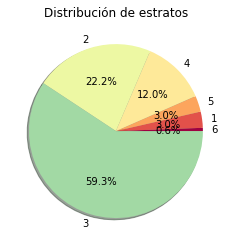

In [ ]:
pie_data = X.groupby('Estrato').agg('count')
labels = pie_data["Edad"].sort_values().index 
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(pie_data["Edad"].sort_values(), labels=labels, autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Distribución de estratos')
plt.show()

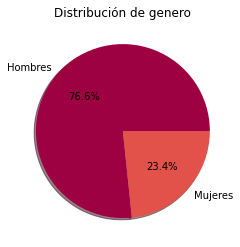

In [ ]:
pie_data = X.groupby("Genero").agg('count')
labels = ["Hombres","Mujeres"]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(pie_data["Edad"], labels=labels, autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Distribución de genero')
plt.show()

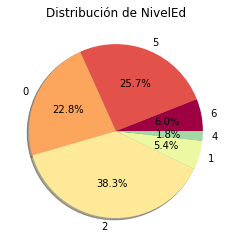

,Genero,Edad,Estrato,ConcProm
NivelEd,,,,
0,10,10,10,10
1,43,43,43,43
2,38,38,38,38
4,64,64,64,64
5,9,9,9,9
6,3,3,3,3


In [ ]:
pie_data = X.groupby("NivelEd").agg('count')
labels = pie_data["Edad"].sort_values().index 
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(pie_data["Edad"], labels=labels, autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Distribución de NivelEd')
plt.show()
pie_data

(0.0, 40.0)

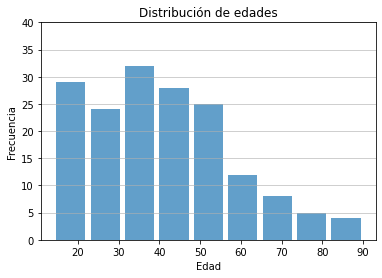

In [ ]:
n, bins, patches = plt.hist(x=X["Edad"], bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

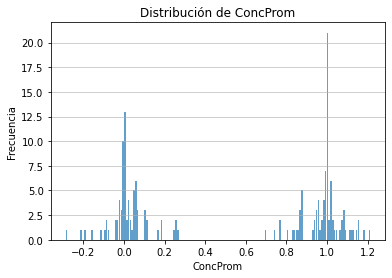

In [ ]:
n, bins, patches = plt.hist(x=X["ConcProm"],bins=167, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('ConcProm')
plt.ylabel('Frecuencia')
plt.title('Distribución de ConcProm')
maxfreq = n.max()
# Set a clean upper y-axis limit.

In the code below, we convert *y* to numpy arrays. This is not strictly necessary, but the labels should be converted to a one-dimensional vector (using reshape in the code below) or Scikit-Learn will show a warning message.

In [ ]:
X=np.array(X)
X_aux=np.array(X_aux)
ConcProm= np.array(ConcProm)

y = np.array(y).reshape((-1,))

In [ ]:
# https://realpython.com/logistic-regression-python/
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.069676
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  167
Model:                          Logit   Df Residuals:                      162
Method:                           MLE   Df Model:                            4
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                  0.8995
Time:                        04:33:08   Log-Likelihood:                -11.636
converged:                       True   LL-Null:                       -115.73
Covariance Type:            nonrobust   LLR p-value:                 6.526e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3703      2.042      0.671      0.502      -2.632       5.372
x2            -0.0156      0

In [ ]:
predicted = result.predict(X,linear=False)
P=[]
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] >= 0.5:
      P.append(1)
      if  y[i] == 1:
         c= c+1
    else: 
      P.append(0)
      if  y[i] == 0:
         c= c+1
print(np.array(P))
print(c/len(predicted))

[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0]
0.9700598802395209


In [ ]:
logit_model=sm.Logit(y,X_aux)
result=logit_model.fit()
print(result.summary())
print(result.summary2())
predicted = result.predict(X_aux)
P=[]
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] >= 0.5:
      P.append(1)
      if  y[i] == 1:
         c= c+1
    else: 
      P.append(0)
      if  y[i] == 0:
         c= c+1
print(np.array(P))
print(c/len(predicted))

Optimization terminated successfully.
         Current function value: 0.687061
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  167
Model:                          Logit   Df Residuals:                      163
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                0.008549
Time:                        04:33:22   Log-Likelihood:                -114.74
converged:                       True   LL-Null:                       -115.73
Covariance Type:            nonrobust   LLR p-value:                    0.5768
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1542      0.368     -0.419      0.675      -0.876       0.567
x2             0.0104      0.

In [ ]:
logit_model=sm.Logit(y,ConcProm)
result=logit_model.fit()
print(result.summary())
print(result.summary2())
predicted = result.predict(ConcProm)
P=[]
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] >= 0.5:
      P.append(1)
      if  y[i] == 1:
         c= c+1
    else: 
      P.append(0)
      if  y[i] == 0:
         c= c+1
print(np.array(P))
print(c/len(predicted))

Optimization terminated successfully.
         Current function value: 0.423633
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  167
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            0
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:                  0.3887
Time:                        04:33:31   Log-Likelihood:                -70.747
converged:                       True   LL-Null:                       -115.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.0360      0.497      6.113      0.000       2.063       4.009
                        Resul

In [ ]:
# https://blog.quantinsti.com/machine-learning-logistic-regression-python/

# Import LogisticRegression sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

SK_logistic_model = LogisticRegression()
SK_logistic_model = SK_logistic_model.fit (X,y)

In [ ]:
SK_logistic_model.classes_

array([0, 1])

In [ ]:
SK_logistic_model.intercept_

array([-2.63887467])

In [ ]:
SK_logistic_model.coef_

array([[ 0.05410921,  0.00768297, -0.21394564,  0.02949068,  5.22350741]])

calculate the probabilities of ecah class for the test dataset using 
‘predict_proba’ function.

In [ ]:
probability = SK_logistic_model.predict_proba(X)
print(probability)

[[0.08046555 0.91953445]
 [0.06488257 0.93511743]
 [0.06555866 0.93444134]
 [0.07269187 0.92730813]
 [0.94829378 0.05170622]
 [0.94400108 0.05599892]
 [0.05981408 0.94018592]
 [0.08543221 0.91456779]
 [0.09118696 0.90881304]
 [0.20104557 0.79895443]
 [0.04553872 0.95446128]
 [0.93695072 0.06304928]
 [0.07858349 0.92141651]
 [0.05853327 0.94146673]
 [0.10381236 0.89618764]
 [0.06061743 0.93938257]
 [0.12360456 0.87639544]
 [0.08850534 0.91149466]
 [0.07312498 0.92687502]
 [0.07593372 0.92406628]
 [0.1237804  0.8762196 ]
 [0.08724883 0.91275117]
 [0.94853371 0.05146629]
 [0.91815473 0.08184527]
 [0.94532953 0.05467047]
 [0.88673583 0.11326417]
 [0.95833513 0.04166487]
 [0.95436208 0.04563792]
 [0.96099202 0.03900798]
 [0.93343931 0.06656069]
 [0.26488098 0.73511902]
 [0.10350903 0.89649097]
 [0.88141955 0.11858045]
 [0.93249235 0.06750765]
 [0.06876232 0.93123768]
 [0.15582362 0.84417638]
 [0.07897071 0.92102929]
 [0.03269665 0.96730335]
 [0.84933489 0.15066511]
 [0.15282061 0.84717939]


In [ ]:
predicted = SK_logistic_model.predict(X)
print(predicted)
print(y)
print(SK_logistic_model.score(X,y))

[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.9760479041916168


In [ ]:
predicted = SK_logistic_model.predict(X)
print(metrics.confusion_matrix(y, predicted))
print(metrics.classification_report(y, predicted))

[[78  4]
 [ 0 85]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        82
           1       0.96      1.00      0.98        85

    accuracy                           0.98       167
   macro avg       0.98      0.98      0.98       167
weighted avg       0.98      0.98      0.98       167



In [ ]:
cross_val5 = cross_val_score(SK_logistic_model, X, y, scoring='accuracy', cv=5)
print(cross_val5)
print(cross_val5.mean())

cross_val10 = cross_val_score(SK_logistic_model, X, y, scoring='accuracy', cv=10)
print(cross_val10)
print(cross_val10.mean())

[0.97058824 0.97058824 1.         0.93939394 1.        ]
0.976114081996435
[1.         0.94117647 1.         0.94117647 1.         1.
 0.94117647 0.9375     1.         1.        ]
0.9761029411764707


In [ ]:
SK_logistic_model = LogisticRegression()
SK_logistic_model = SK_logistic_model.fit (X_aux,y)
predicted = SK_logistic_model.predict(X_aux)
print(predicted)
print(y)
print(SK_logistic_model.score(X_aux,y))

[1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.5508982035928144


In [ ]:
ConcProm= np.array(ConcProm).reshape((-1,1,)) 
SK_logistic_model = LogisticRegression()
SK_logistic_model = SK_logistic_model.fit (ConcProm,y)
predicted = SK_logistic_model.predict(ConcProm)
print(predicted)
print(y)
print(SK_logistic_model.score(ConcProm,y))
SK_logistic_model.coef_

[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.9760479041916168


array([[5.22847133]])

In [ ]:
import h2o
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_oweyhd6
  JVM stdout: /tmp/tmp_oweyhd6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_oweyhd6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_p08nsn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


train  (167, 6)
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1596861255992_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,5,5,50,Key_Frame__upload_a6fc5e5320b88d0e23d6b536d72746e8.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 3.6114319387149623e-10
RMSE: 1.900376788617184e-05
LogLoss: 3.3301216657350563e-06
Null degrees of freedom: 166
Residual degrees of freedom: 161
Null deviance: 231.45726319250497
Residual deviance: 0.001112260636355543
AIC: 12.001112260636356
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9998567796560736: 


,,0,1,Error,Rate
0,0,82.0,0.0,0.0,(0.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,82.0,85.0,0.0,(0.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.998568e-01,1.000000,19.0
1,max f2,9.998568e-01,1.000000,19.0
2,max f0point5,9.998568e-01,1.000000,19.0
3,max accuracy,9.998568e-01,1.000000,19.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.998568e-01,1.000000,19.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.998568e-01,1.000000,19.0
8,max min_per_class_accuracy,9.998568e-01,1.000000,19.0
9,max mean_per_class_accuracy,9.998568e-01,1.000000,19.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 14571.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,276.453374,0.000000,0.000000,0.000000,319.069867,0.000000,319.069867,0.000000,0.000000,-100.000000,-100.000000,-0.024390
1,2,0.023952,240.393475,0.000000,0.000000,0.000000,257.093308,0.000000,288.081588,0.000000,0.000000,-100.000000,-100.000000,-0.048780
2,3,0.029940,231.689828,1.964706,0.392941,1.000000,235.625271,0.200000,277.590324,0.011765,0.011765,96.470588,-60.705882,-0.037016
3,4,0.041916,225.310602,0.982353,0.561345,0.500000,228.939905,0.285714,263.690204,0.011765,0.023529,-1.764706,-43.865546,-0.037446
4,5,0.053892,223.621739,1.964706,0.873203,1.000000,224.690896,0.444444,255.023691,0.023529,0.047059,96.470588,-12.679739,-0.013917
5,6,0.101796,210.911848,0.982353,0.924567,0.500000,214.620967,0.470588,236.010645,0.047059,0.094118,-1.764706,-7.543253,-0.015638
6,7,0.149701,202.513727,0.491176,0.785882,0.250000,207.384408,0.400000,226.850249,0.023529,0.117647,-50.882353,-21.411765,-0.065280
7,8,0.203593,188.462254,1.309804,0.924567,0.666667,194.655877,0.470588,218.328209,0.070588,0.188235,30.980392,-7.543253,-0.031277
8,9,0.299401,179.988673,1.227941,1.021647,0.625000,184.036554,0.520000,207.354880,0.117647,0.305882,22.794118,2.164706,0.013199
9,10,0.401198,161.298058,0.462284,0.879719,0.235294,174.198400,0.447761,198.942041,0.047059,0.352941,-53.771626,-12.028095,-0.098278




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.009353461742277745
RMSE: 0.09671329661570711
LogLoss: 0.06292790328883989
Null degrees of freedom: 166
Residual degrees of freedom: 161
Null deviance: 234.60306001266952
Residual deviance: 21.01791969847252
AIC: 33.017919698472525
AUC: 0.9994261119081779
AUCPR: 0.9994396700118912
Gini: 0.9988522238163557

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25054360603908343: 


,,0,1,Error,Rate
0,0,81.0,1.0,0.0122,(1.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,81.0,86.0,0.006,(1.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.505436e-01,0.994152,11.0
1,max f2,2.505436e-01,0.997653,11.0
2,max f0point5,2.505436e-01,0.990676,11.0
3,max accuracy,2.505436e-01,0.994012,11.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,2.505436e-01,1.000000,11.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,2.505436e-01,0.988088,11.0
8,max min_per_class_accuracy,9.774743e-01,0.987805,10.0
9,max mean_per_class_accuracy,2.505436e-01,0.993902,11.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 84449.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,1498.041712,1.964706,1.964706,1.000000,1709.289022,1.000000,1709.289022,0.023529,0.023529,96.470588,96.470588,0.023529
1,2,0.023952,1342.128136,1.964706,1.964706,1.000000,1394.748373,1.000000,1552.018698,0.023529,0.047059,96.470588,96.470588,0.047059
2,3,0.029940,1242.411826,0.000000,1.571765,0.000000,1319.510038,0.800000,1505.516966,0.000000,0.047059,-100.000000,57.176471,0.034864
3,4,0.041916,1139.399613,0.982353,1.403361,0.500000,1194.335884,0.714286,1416.608085,0.011765,0.058824,-1.764706,40.336134,0.034433
4,5,0.053892,1118.217622,1.964706,1.528105,1.000000,1130.918399,0.777778,1353.121488,0.023529,0.082353,96.470588,52.810458,0.057963
5,6,0.101796,1031.608727,0.982353,1.271280,0.500000,1060.238775,0.647059,1215.294329,0.047059,0.129412,-1.764706,27.128028,0.056241
6,7,0.149701,996.168952,0.736765,1.100235,0.375000,1013.852087,0.560000,1150.832812,0.035294,0.164706,-26.323529,10.023529,0.030560
7,8,0.203593,955.165163,0.654902,0.982353,0.333333,976.415043,0.500000,1104.663402,0.035294,0.200000,-34.509804,-1.764706,-0.007317
8,9,0.299401,898.007565,1.105147,1.021647,0.562500,921.670489,0.520000,1046.105670,0.105882,0.305882,10.514706,2.164706,0.013199
9,10,0.401198,854.378177,0.808997,0.967691,0.411765,874.003533,0.492537,1002.437964,0.082353,0.388235,-19.100346,-3.230904,-0.026399




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,auc,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,aucpr,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,err,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,err_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,f0point5,1.0,0.0,1.0,1.0,1.0,1.0,1.0
6,f1,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,f2,1.0,0.0,1.0,1.0,1.0,1.0,1.0
8,lift_top_group,0.3529412,0.7892005,0.0,0.0,0.0,0.0,1.7647059
9,logloss,0.069752894,0.13186243,0.044651885,6.337523E-14,1.9695597E-4,7.9241575E-4,0.3031232



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-08-08 04:34:31,0.000 sec,0,115.728632,0.692986
1,,2020-08-08 04:34:31,0.006 sec,1,28.468566,0.170470
2,,2020-08-08 04:34:31,0.011 sec,2,14.842785,0.088879
3,,2020-08-08 04:34:31,0.013 sec,3,9.828257,0.058852
4,,2020-08-08 04:34:31,0.021 sec,4,6.958851,0.041670
5,,2020-08-08 04:34:31,0.022 sec,5,4.685763,0.028058
6,,2020-08-08 04:34:31,0.023 sec,6,2.684028,0.016072
7,,2020-08-08 04:34:31,0.024 sec,7,1.272973,0.007623
8,,2020-08-08 04:34:31,0.027 sec,8,0.539058,0.003228
9,,2020-08-08 04:34:31,0.032 sec,9,0.218663,0.001309



See the whole table with table.as_data_frame()



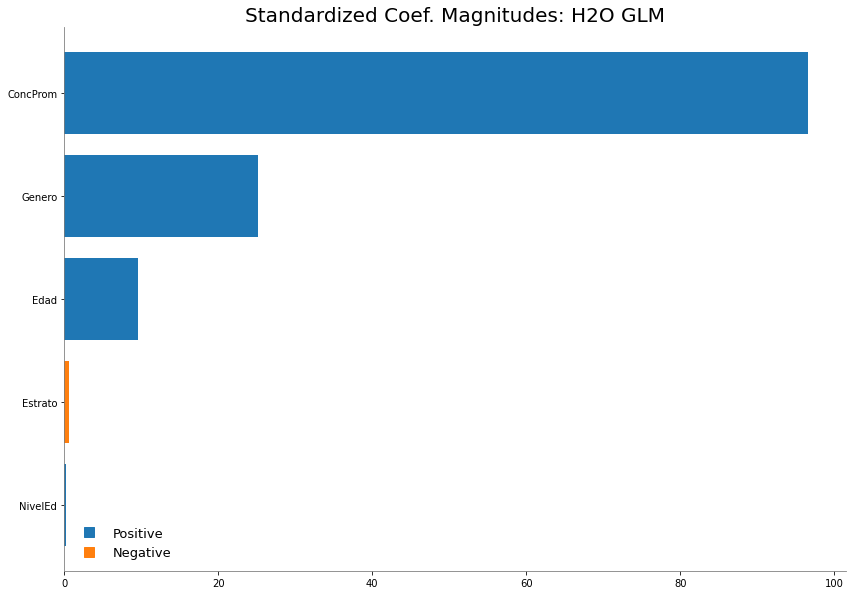

In [ ]:
X = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
y = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')
train = X.join(y)
print('train ', train.shape)
train_h = h2o.H2OFrame(train)


predictors = ["Genero","Edad","Estrato","NivelEd","ConcProm"]
response_col = "Accidente"

glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,
                                          compute_p_values = True,
                                          nfolds = 5)
glm_model.train(predictors, response_col, training_frame= train_h)

print(glm_model)
glm_model.std_coef_plot()



In [ ]:
preds = glm_model.predict(train_h)
preds = h2o.as_list(preds)
predicted = np.array(preds["predict"])
y = np.array(train["Accidente"])
print(predicted)
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] == y[i]:
       c= c+1
print(c/len(predicted))

glm prediction progress: |████████████████████████████████████████████████| 100%
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
1.0


glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1596859679364_19


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,4,4,3,Key_Frame__upload_a70713627a61974e14c6c5df21b84e67.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.24076064927142843
RMSE: 0.4906736688181142
LogLoss: 0.6738336515974194
Null degrees of freedom: 166
Residual degrees of freedom: 162
Null deviance: 231.45726319250497
Residual deviance: 225.06043963353804
AIC: 235.06043963353804
AUC: 0.5954088952654232
AUCPR: 0.5934208077970493
Gini: 0.19081779053084635

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4307553500719777: 


,,0,1,Error,Rate
0,0,22.0,60.0,0.7317,(60.0/82.0)
1,1,8.0,77.0,0.0941,(8.0/85.0)
2,Total,30.0,137.0,0.4072,(68.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.430755,0.693694,106.0
1,max f2,0.286529,0.844930,130.0
2,max f0point5,0.430755,0.608215,106.0
3,max accuracy,0.484352,0.592814,82.0
4,max precision,0.639992,0.818182,10.0
5,max recall,0.286529,1.000000,130.0
6,max specificity,0.760318,0.987805,0.0
7,max absolute_mcc,0.430755,0.226820,106.0
8,max min_per_class_accuracy,0.511254,0.564706,61.0
9,max mean_per_class_accuracy,0.484352,0.590316,82.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 34.36 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,0.677998,0.000000,0.000000,0.000000,0.759531,0.000000,0.759531,0.000000,0.000000,-100.000000,-100.000000,-0.024390
1,2,0.023952,0.571420,0.000000,0.000000,0.000000,0.619800,0.000000,0.689665,0.000000,0.000000,-100.000000,-100.000000,-0.048780
2,3,0.029940,0.560109,1.964706,0.392941,1.000000,0.560411,0.200000,0.663814,0.011765,0.011765,96.470588,-60.705882,-0.037016
3,4,0.041916,0.537732,0.982353,0.561345,0.500000,0.551924,0.285714,0.631846,0.011765,0.023529,-1.764706,-43.865546,-0.037446
4,5,0.053892,0.532639,0.982353,0.654902,0.500000,0.534075,0.333333,0.610119,0.011765,0.035294,-1.764706,-34.509804,-0.037877
5,6,0.101796,0.482932,1.227941,0.924567,0.625000,0.509868,0.470588,0.562942,0.058824,0.094118,22.794118,-7.543253,-0.015638
6,7,0.149701,0.449773,1.227941,1.021647,0.625000,0.465024,0.520000,0.531608,0.058824,0.152941,22.794118,2.164706,0.006600
7,8,0.203593,0.407108,1.091503,1.040138,0.555556,0.433564,0.529412,0.505655,0.058824,0.211765,9.150327,4.013841,0.016643
8,9,0.299401,0.381965,0.982353,1.021647,0.500000,0.392789,0.520000,0.469538,0.094118,0.305882,-1.764706,2.164706,0.013199
9,10,0.401198,0.358321,1.155709,1.055663,0.588235,0.370755,0.537313,0.444474,0.117647,0.423529,15.570934,5.566286,0.045481




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.25772225594973863
RMSE: 0.5076635263141707
LogLoss: 0.7098697001919744
Null degrees of freedom: 166
Residual degrees of freedom: 162
Null deviance: 232.80311880807173
Residual deviance: 237.09647986411943
AIC: 247.09647986411943
AUC: 0.5242467718794834
AUCPR: 0.543999049002535
Gini: 0.04849354375896686

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2326816948989186: 


,,0,1,Error,Rate
0,0,1.0,81.0,0.9878,(81.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,1.0,166.0,0.485,(81.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.232682,0.677291,157.0
1,max f2,0.232682,0.839921,157.0
2,max f0point5,0.493813,0.576520,90.0
3,max accuracy,0.493813,0.562874,90.0
4,max precision,0.680437,0.800000,4.0
5,max recall,0.232682,1.000000,157.0
6,max specificity,0.811320,0.987805,0.0
7,max absolute_mcc,0.616461,0.130054,30.0
8,max min_per_class_accuracy,0.506966,0.517647,77.0
9,max mean_per_class_accuracy,0.493813,0.561334,90.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 204.26 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,3.625835,1.964706,1.964706,1.000000,4.047230,1.000000,4.047230,0.023529,0.023529,96.470588,96.470588,0.023529
1,2,0.023952,3.138128,1.964706,1.964706,1.000000,3.403157,1.000000,3.725193,0.023529,0.047059,96.470588,96.470588,0.047059
2,3,0.029940,2.730546,0.000000,1.571765,0.000000,2.739839,0.800000,3.528122,0.000000,0.047059,-100.000000,57.176471,0.034864
3,4,0.041916,2.658709,0.000000,1.122689,0.000000,2.726088,0.571429,3.298970,0.000000,0.047059,-100.000000,12.268908,0.010473
4,5,0.053892,2.539495,0.982353,1.091503,0.500000,2.585941,0.555556,3.140519,0.011765,0.058824,-1.764706,9.150327,0.010043
5,6,0.101796,2.358546,0.982353,1.040138,0.500000,2.423267,0.529412,2.802988,0.047059,0.105882,-1.764706,4.013841,0.008321
6,7,0.149701,2.318353,1.227941,1.100235,0.625000,2.336541,0.560000,2.653725,0.058824,0.164706,22.794118,10.023529,0.030560
7,8,0.203593,2.275895,1.091503,1.097924,0.555556,2.302911,0.558824,2.560863,0.058824,0.223529,9.150327,9.792388,0.040603
8,9,0.299401,2.178081,1.227941,1.139529,0.625000,2.233691,0.580000,2.456168,0.117647,0.341176,22.794118,13.952941,0.085079
9,10,0.401198,2.083816,1.040138,1.114311,0.529412,2.125906,0.567164,2.372370,0.105882,0.447059,4.013841,11.431080,0.093400




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.58577114,0.08807971,0.5714286,0.4878049,0.51724136,0.6666667,0.6857143
1,auc,0.53601074,0.084264785,0.503268,0.51328504,0.43809524,0.5604396,0.664966
2,aucpr,0.5719925,0.12293138,0.58674294,0.47053912,0.5526048,0.4768241,0.7732516
3,err,0.41422886,0.08807971,0.42857143,0.5121951,0.4827586,0.33333334,0.31428573
4,err_count,14.0,4.582576,15.0,21.0,14.0,9.0,11.0
5,f0point5,0.6110822,0.07682225,0.59859157,0.51724136,0.57251906,0.64705884,0.72
6,f1,0.6965819,0.048567284,0.6938776,0.6315789,0.6818182,0.7096774,0.7659575
7,f2,0.8165293,0.020890487,0.8252427,0.8108108,0.8426966,0.78571427,0.8181818
8,lift_top_group,1.1088889,1.0183623,1.9444444,0.0,1.9333333,0.0,1.6666666
9,logloss,0.71038383,0.027907612,0.6987006,0.7332404,0.72916466,0.7241738,0.66663986



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-08-08 04:08:12,0.000 sec,0,115.728632,0.692986
1,,2020-08-08 04:08:12,0.004 sec,1,112.541712,0.673902
2,,2020-08-08 04:08:12,0.006 sec,2,112.530221,0.673834
3,,2020-08-08 04:08:12,0.008 sec,3,112.530220,0.673834


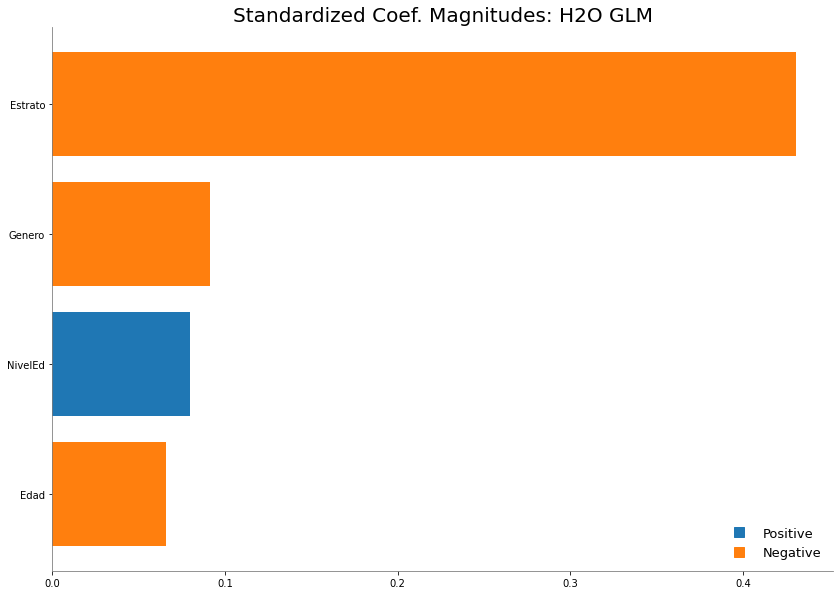

glm prediction progress: |████████████████████████████████████████████████| 100%
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.592814371257485


In [ ]:
predictors = ["Genero","Edad","Estrato","NivelEd"]
response_col = "Accidente"

glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,
                                          compute_p_values = True,
                                          nfolds = 5)
glm_model.train(predictors, response_col, training_frame= train_h)

print(glm_model)
glm_model.std_coef_plot()
preds = glm_model.predict(train_h)
preds = h2o.as_list(preds)
predicted = np.array(preds["predict"])
y = np.array(train["Accidente"])
print(predicted)
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] == y[i]:
       c= c+1
print(c/len(predicted))

glm Model Build progress: |███████████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1596861255992_19


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,1,1,50,Key_Frame__upload_a6fc5e5320b88d0e23d6b536d72746e8.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 7.923938692418326e-08
RMSE: 0.00028149491456185005
LogLoss: 3.571589076947808e-05
Null degrees of freedom: 166
Residual degrees of freedom: 165
Null deviance: 231.45726319250497
Residual deviance: 0.011929107517005797
AIC: 4.011929107517005
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9970584693702641: 


,,0,1,Error,Rate
0,0,82.0,0.0,0.0,(0.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,82.0,85.0,0.0,(0.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.970585e-01,1.000000,10.0
1,max f2,9.970585e-01,1.000000,10.0
2,max f0point5,9.970585e-01,1.000000,10.0
3,max accuracy,9.970585e-01,1.000000,10.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.970585e-01,1.000000,10.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.970585e-01,1.000000,10.0
8,max min_per_class_accuracy,9.970585e-01,1.000000,10.0
9,max mean_per_class_accuracy,9.970585e-01,1.000000,10.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 6680.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,136.471990,0.000000,0.000000,0.000000,143.224185,0.000000,143.224185,0.000000,0.000000,-100.000000,-100.000000,-0.024390
1,2,0.023952,128.819481,0.000000,0.000000,0.000000,133.469147,0.000000,138.346666,0.000000,0.000000,-100.000000,-100.000000,-0.048780
2,3,0.029940,121.938619,0.000000,0.000000,0.000000,123.946465,0.000000,135.466626,0.000000,0.000000,-100.000000,-100.000000,-0.060976
3,4,0.041916,121.050844,0.000000,0.000000,0.000000,121.490053,0.000000,131.473320,0.000000,0.000000,-100.000000,-100.000000,-0.085366
4,5,0.053892,118.009245,0.000000,0.000000,0.000000,120.286132,0.000000,128.987278,0.000000,0.000000,-100.000000,-100.000000,-0.109756
5,6,0.101796,111.446028,0.000000,0.000000,0.000000,112.916137,0.000000,121.424388,0.000000,0.000000,-100.000000,-100.000000,-0.207317
6,7,0.149701,109.151666,0.000000,0.000000,0.000000,110.163694,0.000000,117.820966,0.000000,0.000000,-100.000000,-100.000000,-0.304878
7,8,0.203593,108.940603,0.000000,0.000000,0.000000,108.992784,0.000000,115.484094,0.000000,0.000000,-100.000000,-100.000000,-0.414634
8,9,0.299401,104.332505,0.000000,0.000000,0.000000,107.520943,0.000000,112.935886,0.000000,0.000000,-100.000000,-100.000000,-0.609756
9,10,0.401198,95.141766,0.000000,0.000000,0.000000,101.100651,0.000000,109.932916,0.000000,0.000000,-100.000000,-100.000000,-0.817073




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.005051637698889581
RMSE: 0.07107487389288553
LogLoss: 0.01522822617407662
Null degrees of freedom: 166
Residual degrees of freedom: 165
Null deviance: 233.4108070596772
Residual deviance: 5.086227542141589
AIC: 9.08622754214159
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08212487155377114: 


,,0,1,Error,Rate
0,0,82.0,0.0,0.0,(0.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,82.0,85.0,0.0,(0.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,8.212487e-02,1.000000,4.0
1,max f2,8.212487e-02,1.000000,4.0
2,max f0point5,8.212487e-02,1.000000,4.0
3,max accuracy,8.212487e-02,1.000000,4.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,8.212487e-02,1.000000,4.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,8.212487e-02,1.000000,4.0
8,max min_per_class_accuracy,8.212487e-02,1.000000,4.0
9,max mean_per_class_accuracy,8.212487e-02,1.000000,4.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 36266.90 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,553.524901,0.000000,0.000000,0.000000,587.921007,0.000000,587.921007,0.000000,0.000000,-100.000000,-100.000000,-0.024390
1,2,0.023952,543.969177,0.000000,0.000000,0.000000,545.977132,0.000000,566.949069,0.000000,0.000000,-100.000000,-100.000000,-0.048780
2,3,0.029940,540.161044,0.000000,0.000000,0.000000,542.333593,0.000000,562.025974,0.000000,0.000000,-100.000000,-100.000000,-0.060976
3,4,0.041916,533.458753,0.000000,0.000000,0.000000,537.010473,0.000000,554.878688,0.000000,0.000000,-100.000000,-100.000000,-0.085366
4,5,0.053892,530.265026,0.982353,0.218301,0.500000,531.878746,0.111111,549.767590,0.011765,0.011765,-1.764706,-78.169935,-0.085796
5,6,0.101796,479.782907,0.000000,0.115571,0.000000,511.093497,0.058824,531.568017,0.000000,0.011765,-100.000000,-88.442907,-0.183357
6,7,0.149701,449.803696,0.982353,0.392941,0.500000,463.694413,0.200000,509.848464,0.047059,0.058824,-1.764706,-60.705882,-0.185079
7,8,0.203593,440.592779,0.654902,0.462284,0.333333,446.140032,0.235294,492.984467,0.035294,0.094118,-34.509804,-53.771626,-0.222956
8,9,0.299401,411.166106,0.245588,0.392941,0.125000,430.396958,0.200000,472.956464,0.023529,0.117647,-75.441176,-60.705882,-0.370158
9,10,0.401198,375.115938,1.040138,0.557155,0.529412,388.388058,0.283582,451.498809,0.105882,0.223529,4.013841,-44.284460,-0.361836




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,auc,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,aucpr,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,err,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,err_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,f0point5,1.0,0.0,1.0,1.0,1.0,1.0,1.0
6,f1,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,f2,1.0,0.0,1.0,1.0,1.0,1.0,1.0
8,lift_top_group,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,logloss,0.015891956,0.035460923,9.6335934E-5,0.07932634,1.5509662E-10,3.1093648E-14,3.7099504E-5



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-08-08 04:34:48,0.000 sec,0,115.728632,0.692986
1,,2020-08-08 04:34:48,0.002 sec,1,28.528825,0.170831
2,,2020-08-08 04:34:48,0.002 sec,2,15.179371,0.090894
3,,2020-08-08 04:34:48,0.002 sec,3,10.781380,0.064559
4,,2020-08-08 04:34:48,0.003 sec,4,8.637178,0.051720
5,,2020-08-08 04:34:48,0.003 sec,5,6.426209,0.038480
6,,2020-08-08 04:34:48,0.004 sec,6,3.648568,0.021848
7,,2020-08-08 04:34:48,0.004 sec,7,2.284289,0.013678
8,,2020-08-08 04:34:48,0.004 sec,8,1.404315,0.008409
9,,2020-08-08 04:34:48,0.005 sec,9,0.869950,0.005209



See the whole table with table.as_data_frame()



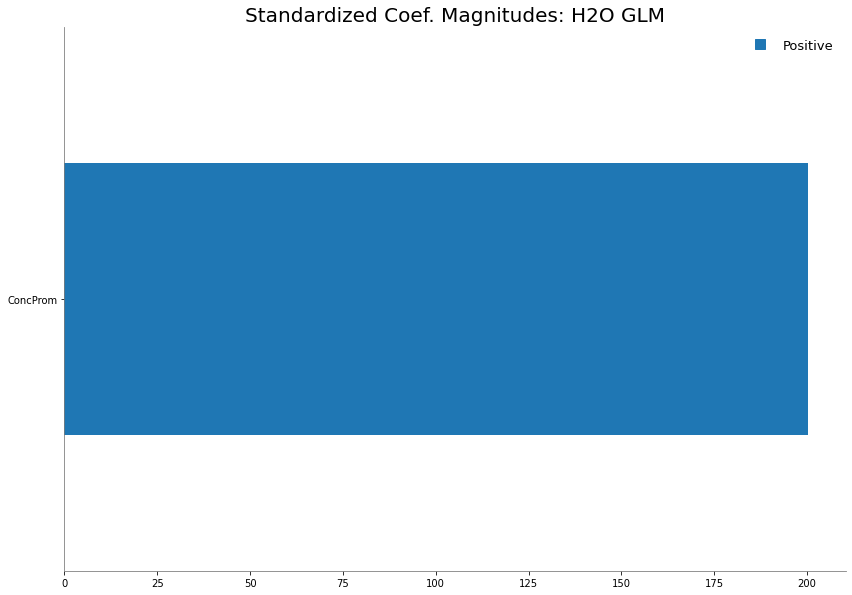

glm prediction progress: |████████████████████████████████████████████████| 100%
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
1.0


In [ ]:
predictors = ["ConcProm"]
response_col = "Accidente"

glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,
                                          compute_p_values = True,
                                          nfolds = 5)
glm_model.train(predictors, response_col, training_frame= train_h)

print(glm_model)
glm_model.std_coef_plot()
preds = glm_model.predict(train_h)
preds = h2o.as_list(preds)
predicted = np.array(preds["predict"])
y = np.array(train["Accidente"])
print(predicted)
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] == y[i]:
       c= c+1
print(c/len(predicted))

In [ ]:
h2o.ls()
h2o.shutdown()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  


H2O session _sid_8bc8 closed.


In [ ]:
# Import the tpot classifier 
from tpot import TPOTClassifier 

# Create a tpot object with a few parameters
tpot = TPOTClassifier(scoring = 'accuracy', 
                    max_time_mins = 20, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5)

In [ ]:
# Fit the tpot model on the training data
tpot.fit(X, y)


Generation 1 - Current best internal CV score: 1.0
Generation 2 - Current best internal CV score: 1.0
Generation 3 - Current best internal CV score: 1.0
Generation 4 - Current best internal CV score: 1.0
Generation 5 - Current best internal CV score: 1.0
Generation 6 - Current best internal CV score: 1.0
Generation 7 - Current best internal CV score: 1.0
Generation 8 - Current best internal CV score: 1.0
Generation 9 - Current best internal CV score: 1.0
Generation 10 - Current best internal CV score: 1.0
Generation 11 - Current best internal CV score: 1.0
Generation 12 - Current best internal CV score: 1.0
Generation 13 - Current best internal CV score: 1.0
Generation 14 - Current best internal CV score: 1.0
Generation 15 - Current best internal CV score: 1.0
Generation 16 - Current best internal CV score: 1.0
Generation 17 - Current best internal CV score: 1.0
Generation 18 - Current best internal CV score: 1.0
Generation 19 - Current best internal CV score: 1.0
Generation 20 - Curr

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=<colorama.ansitowin32.StreamWrapper object at 0x7f2ad3752550>,
               max_eval_time_mins=5, max_time_mins=20, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [ ]:
# Evaluate the final model 
print(tpot.score(X, y))

1.0


In [ ]:
print(tpot.fitted_pipeline_)


Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None,
                                        max_features=0.7000000000000001,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=13,
                                        min_samples_split=18,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)


In [ ]:
tpot_best_model = tpot.fitted_pipeline_[0]

cross_val5 = cross_val_score(tpot_best_model, X, y, scoring='accuracy', cv=5)
print(cross_val5)
print(cross_val5.mean())

cross_val10 = cross_val_score(tpot_best_model, X, y, scoring='accuracy', cv=10)
print(cross_val10)
print(cross_val10.mean())

[1. 1. 1. 1. 1.]
1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [ ]:
# Export the pipeline as a python script file
tpot.export('tpot_exported_pipeline.py')

In a run TPOT produced DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=14, min_samples_split=20)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
# https://scikit-learn.org/stable/modules/compose.html#combining-estimators
from sklearn.tree import DecisionTreeClassifier
features =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
target =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')

exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=14, min_samples_split=20)

exported_pipeline.fit(features, target)

features=np.array(features)

estimator = exported_pipeline
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(features)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(features)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

for sample_id in range(6):
  node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                      node_indicator.indptr[sample_id + 1]]

  print('\nRules used to predict sample %s: ' % sample_id)
  for node_id in node_index:
      if leave_id[sample_id] == node_id:
          continue

      if (features[sample_id, feature[node_id]] <= threshold[node_id]):
          threshold_sign = "<="
      else:
          threshold_sign = ">"

      print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
            % (node_id,
              sample_id,
              feature[node_id],
              features[sample_id, feature[node_id]],
              threshold_sign,
              threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0,1,2,3,3,4,5]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                  len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
        % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 3 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 4] <= 0.7854282855987549 else to node 2.
	node=1 leaf node.
	node=2 leaf node.


Rules used to predict sample 0: 
decision id node 0 : (X_test[0, 4] (= 0.999998458) > 0.7854282855987549)

Rules used to predict sample 1: 
decision id node 0 : (X_test[1, 4] (= 1.00000994) > 0.7854282855987549)

Rules used to predict sample 2: 
decision id node 0 : (X_test[2, 4] (= 0.985683394) > 0.7854282855987549)

Rules used to predict sample 3: 
decision id node 0 : (X_test[3, 4] (= 0.9999934909999999) > 0.7854282855987549)

Rules used to predict sample 4: 
decision id node 0 : (X_test[4, 4] (= 2.3899999999999998e-05) <= 0.7854282855987549)

Rules used to predict sample 5: 
decision id node 0 : (X_test[5, 4] (= -6.27e-06) <= 0.7854282855987549)

The following samples [0, 1, 2, 3, 3, 4, 5] share the node [0] in the tree
It is 33.333333333333336 % of all nodes.


To save the pipeline for future use, we can export it to a Python script. 

Since we are in a Google Colab notebook, this will save it on the server where our notebook is running and the file  will only persist while we are connected. To download the pipeline onto a local machine from Google's servers, we have to use the file helper functions (from `gooogle.colab`) to download it. 

The file can be [accessed on GitHub](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/auto_ml/tpot_exported_pipeline.py).

If we want to look at all of the evaluated pipelines, we can see the `.evaluated_individuals_` attribute of the fitted optimizer. Be careful about running this as it will print out all 1500 pipelines that were tested!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
target =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')

# Average CV score on the training set was: 1.0
exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=14, min_samples_split=20)

exported_pipeline.fit(features, target)

cross_val5 = cross_val_score(exported_pipeline, X, y, scoring='accuracy', cv=5)
print(cross_val5)
print(cross_val5.mean())

cross_val10 = cross_val_score(exported_pipeline, X, y, scoring='accuracy', cv=10)
print(cross_val10)
print(cross_val10.mean())


[1. 1. 1. 1. 1.]
1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
